## Supervised Learning Series

# Part 1: Linear regression

In this post we formally describe the problem of *linear regression*, or the fitting of a representative line (in higher dimensions) to a set of input/output data points. Regression in general may be performed for a variety of reasons: to produce a so-called trend line (or - more generally - a curve) that can be used to help visually summarize, drive home a particular point about the data under study, or to learn a model so that precise predictions can be made regarding output values in the future.

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import superlearn_library as superlearn
import autograd.numpy as np
import math
import pandas as pd
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 1.  Linear regression

With linear regression we aim to fit a line (or hyperplane in higher dimensions) to a scattering of data. In this Section we describe the fundamental concepts underlying this procedure. 

## 1.1  Notation and modeling

Data for regression problems comes in the form of a training set of
$P$ input/output observation pairs

\begin{equation}
 \left(\mathbf{x}_{1},y_{1}\right),\left(\mathbf{x}_{2},y_{2}\right),...,\left(\mathbf{x}_{P},y_{P}\right)
\end{equation}

or $\left\{ \left(\mathbf{x}_{p},y_{p}\right)\right\} _{p=1}^{P}$ for short, where $\mathbf{x}_{p}$ and $y_{p}$ denote the $p^{\textrm{th}}$ input and output respectively. In simple instances the input is scalar-valued (the output will always be considered scalar-valued here) and hence the linear regression problem is geometrically speaking one of fitting a line to the associated scatter of data points in 2-dimensional space.  In general however
each input $\mathbf{x}_{p}$ may be a column vector of length $N$

\begin{equation}
\mathbf{x}_{p}=\left[\begin{array}{c}
x_{1,p}\\
x_{2,p}\\
\vdots\\
x_{N,p}
\end{array}\right].
\end{equation}

in which case the linear regression problem is analogously one of fitting a hyperplane to a scatter of points in $N+1$ dimensional space. 

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_3_1.png' width="100%" height="60%" alt=""/>
  <figcaption>   
<strong>Figure 1:</strong> <em>  A dataset in two dimensions along with a well-fitting line. A line in two dimensions is defined as $w_{0}+xw_{1}=y$, where $w_{0}$ is referred to as the bias and $w_{1}$ the slope, and a point $\left(x_{p},y_{p}\right)$ lies close to it if $w_{0}+x_{p}w_{1}\approx y_{p}$. (right panel) A simulated three dimensional dataset along with a well-fitting hyperplane. A hyperplane is defined as $w_{0}+ x_{1}w_{1} + x_{2}w_{2} + \cdots x_{N}w_{N}=y$, where again $w_{0}$ is called the bias and $w_{1},\,w_{2},\,\cdots \,,w_{N}$ the hyperplanes coordinate wise slopes, and a point $\left(\mathbf{x}_{p},y_{p}\right)$ lies close to it if $w_{0}+ x_{1,p}w_{1} + x_{2,p}w_{2} + \cdots x_{N,p}w_{N} \approx y_{p}$ </em>  </figcaption> 
</figure>

In the case of scalar input the fitting a line to the data requires we determine a vertical intercept $w_0$ and slope $w_1$ so that the approximate linear relationship
holds between the input/output data

\begin{equation}
w_{0}+x_{p}w_{1}\approx y_{p},\quad p=1,...,P.
\end{equation}

Notice that we have used the approximately equal sign in because we cannot be sure
that all data lies completely on a single line.  More generally when the input dimension is $N\geq1$ then we have a bias and $N$ associated slope weights to tune properly in order to fit a hyperplane. Likewise the linear relationship in is then more generally given as

\begin{equation}
w_{0}+ x_{1,p}w_{1} + x_{2,p}w_{2} + \cdots x_{N,p}w_{N} \approx y_{p} ,\quad p=1,...,P.
\end{equation}

For any $N$ we can write the above more compactly via the *inner product* by denoting

\begin{equation}
\mathbf{w}=\left[\begin{array}{c}
w_{0}\\
w_{1}\\
\vdots\\
w_{N}
\end{array}\right]
\,\,\,\,\,\,\,\,\,\,\,\,\,\,
\mathbf{x}_p=\left[\begin{array}{c}
1\\
x_{1,p}\\
\vdots\\
x_{N,p}
\end{array}\right]
\end{equation}

Then we have that the desired relationship is in general

\begin{equation}
\mathbf{x}_{p}^T\mathbf{w} \approx y_{p} ,\quad p=1,...,P.
\end{equation}

The elements of an input vector $\mathbf{x}_{p}$ are referred to as *input features* to a regression problem.  In the McDonald's revenue history dataset data described in the first post of our *basics of mathematical functions* series, the input feature was *year*.  Conversely in the GDP growth rate data described in the Example below the first element of the input feature vector might contain the feature *unemployment rate* (that is, the unemployment data from each country under study), the second might contain the feature *education level*, and so on. 

#### <span style="color:#a50e3e;">Example 1: </span> Predicting Gross Domestic Product growth rates

As an example of a regression problem with vector-valued input consider the problem of predicting the growth rate of a country's Gross Domestic Product (GDP), which is the value of all goods and services produced within a country during a single year. Economists are often interested in understanding factors (e.g., unemployment rate, education level, population count, land area, income level, investment rate, life expectancy, etc.,) which determine a country's GDP growth rate in order to inform better financial policy making. To understand how these various features of a country relate to its GDP growth rate economists often perform linear regression

In the Figure beow we show a heat map of the world where countries are color-coded based on their GDP growth rate in 2013, reported by the International Monetary Fund (IMF) (data from this Figure was taken from [1]).

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_3_2.png' width="70%" height="60%" alt=""/>
  <figcaption>   
<strong>Figure 2:</strong> <em>  A map of the world where countries are color-coded by their GDP growth rates (the darker color the higher the growth rate) as reported by the International Monetary Fund (IMF) in 2013.  </em>  </figcaption> 
</figure>

## 1.2  The Least Squares cost function

To find the parameters of the hyperplane which best fits a regression dataset, it is common practice to first form the *Least Squares cost function*. For a given set of parameters $\mathbf{w}$ this cost function computes the total squared error between the associated hyperplane and the data (as illustrated pictorially in the Figure below, giving a good measure of how well the particular linear model fits
the dataset. Naturally then the best fitting hyperplane is the one whose parameters minimize this error.

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_3_3.png' width="50%" height="50%" alt=""/>
  <figcaption>   
<strong>Figure 2:</strong> <em>  A simulated two dimensional training dataset along with a line (in magenta) fit to the data using the Least Squares framework, which aims at recovering the line that minimizes the total squared length of the dashed error bars.  </em>  </figcaption> 
</figure>

We want to find a weight vector $\mathbf{w}$ so that each of $P$ approximate equalities in equation (6) holds as well as possible.  Notice another way of saying that $\mathbf{x}_{p}^T\mathbf{w} \approx y_{p}$ - meaning that the approximation "$\approx$" is as close to an equality "$=$" as possible - is to say that the *error* between $\mathbf{x}_{p}^{T}\mathbf{w}$ and $y_{p}$ is small.  One natural way to measure error between two quantities like this is simply to square their difference as 

\begin{equation}
\left(\mathbf{x}_{p}^{T}\mathbf{w} - y_{p}^{\,}\right)^2
\end{equation}

Since we want all $P$ such values to be small we can sum them up - forming a *Least Squares* cost function

\begin{equation}
\,g\left(\mathbf{w}\right)=\sum_{p=1}^{P}\left(\mathbf{x}_{p}^{T}\mathbf{w}-y_{p}^{\,}\right)^{2}
\end{equation}

In particular, it is the *Least Squares cost function for linear regression*.

We want to find a parameter pair $\mathbf{w}$ that provides a small value for $g\left(\mathbf{w}\right)$ since the larger this value becomes the larger the squared error between the corresponding linear model and the data, the worse the $p^{th}$ approximation becomes, and hence the poorer we represent the given dataset using a linear model. In other words, we want to determine a value for $\mathbf{w}$ that *minimizes* $g(\mathbf{w})$, or written formally we want to solve the unconstrained problem

\begin{equation}
\underset{\mathbf{w}}{\mbox{minimize}}\,\,\underset{p=1}{\overset{P}{\sum}}\left(\mathbf{x}_{p}^{T}\mathbf{w}-y_{p}^{\,}\right)^{2}.
\end{equation}

## 1.3  Minimization of the Least Squares cost function

As discussed in our *mathematical optimization series*, generally speaking determining the overall shape of a function - i.e., whether or not a function is convex - helps determine the appropriate optimization method(s) we can apply to efficiently determine the ideal $\mathbf{w}$.  In the case of the Least Squares cost function for linear regression it is easy to check that *the cost function is always convex regardless of the dataset*.  

For small input dimensions (i.e., $N=1$ or $N=2$) we can empirically verify this claim for any given dataset by simply plotting the function $g(\mathbf{w})$ - as a surface and/or contour plot - as we do in the example below.

#### <span style="color:#a50e3e;">Example 2: </span> Visually verifying the convexity of the cost function for a toy dataset

In this example we plot the contour and surface plot for the Least Squares cost function for linear regression for a toy dataset.  This toy dataset consists of 50 points randomly selected off of the line $y = x$, with a small amount of Gaussian noise added to each.  

<IPython.core.display.Javascript object>


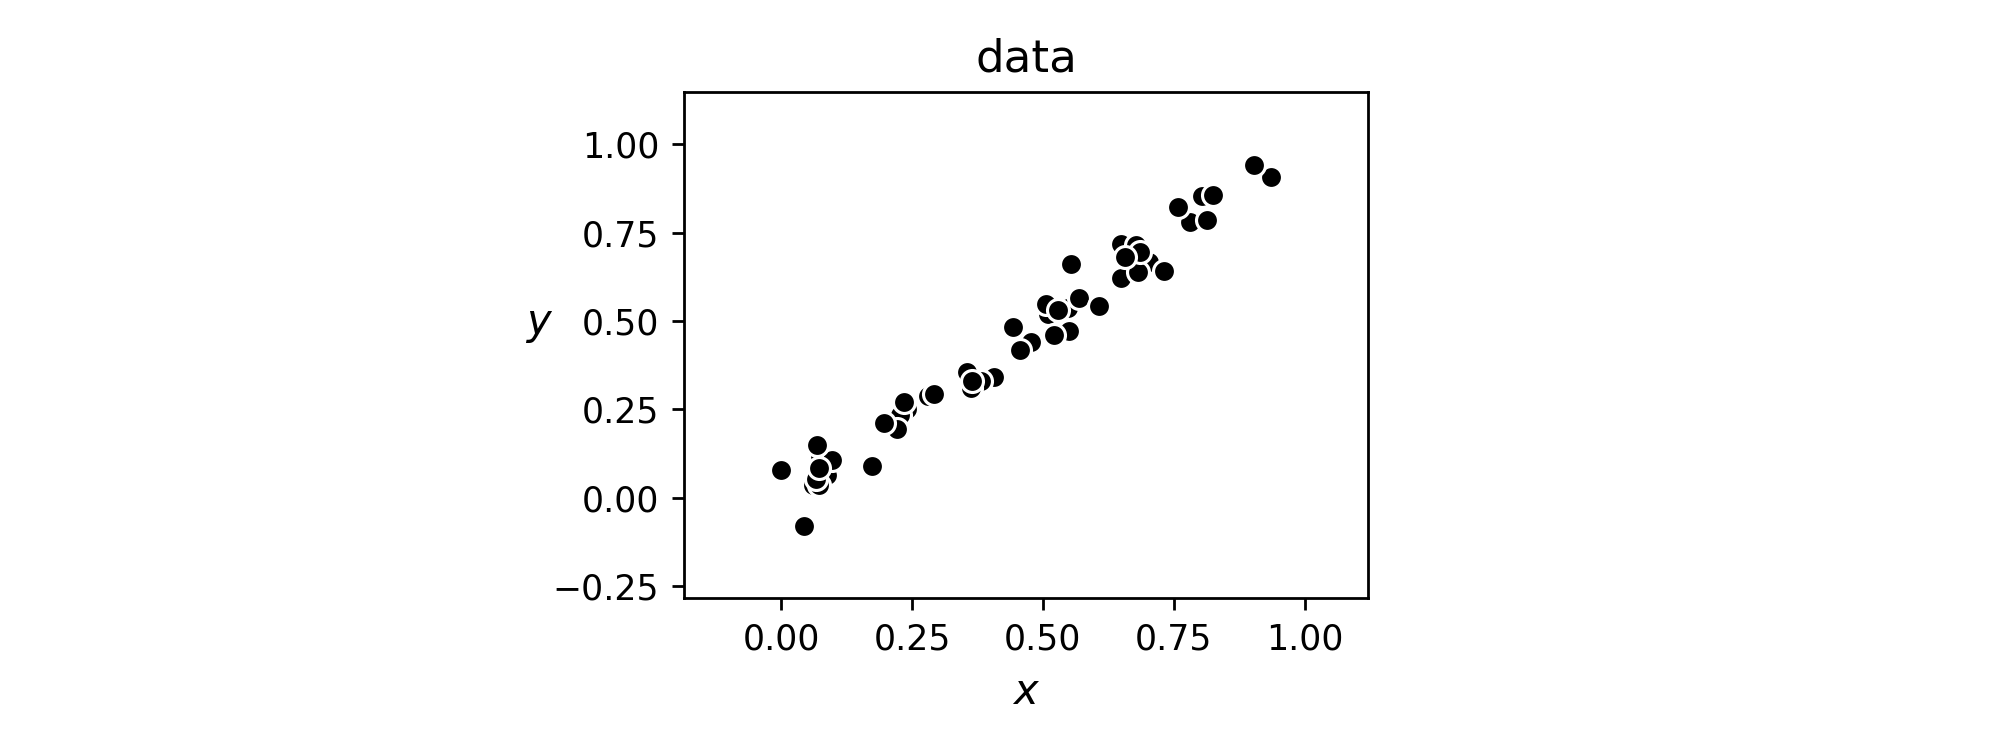

In [3]:
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/2d_linregress_data.csv'
data = np.asarray(pd.read_csv(datapath,header = None))

# create instance of linear regression demo, used below and in the next examples
demo = superlearn.lin_regression_demos.visualizer(data)

# plot dataset
demo.plot_data()

The contour plot and corresponding surface generated by the Least Squares cost function using this data are shown below shown below.  Examining either one can conclude that the cost function is convex.  

<IPython.core.display.Javascript object>


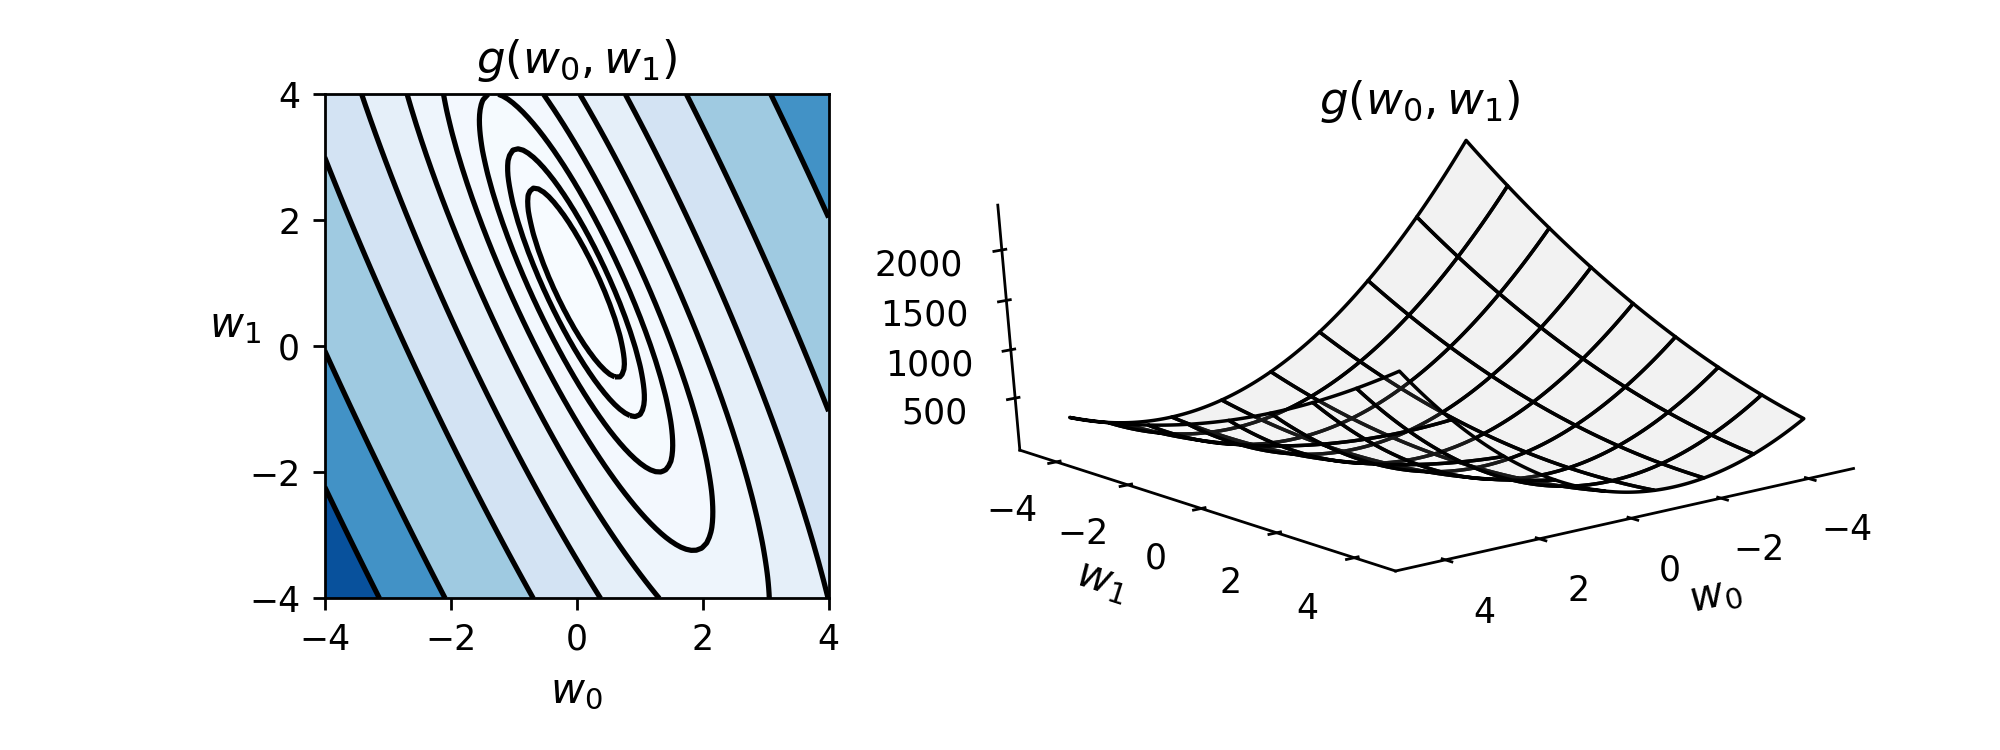

In [30]:
# demo.center_data()
demo.plot_ls_cost(view = [30,50],wmax = 4,num_contours = 35)

----

In the previous example we plotted the contour / surface for the Least Squares cost function for linear regression on a specific dataset.  There we saw the elliptical contours and 'upward bending' shape of the surface indeed confirms the function's convexity in that case.  However the Least Squares cost function for linear regression can be mathematically shown to be  - in general - a convex function for *any dataset*.  Because of this we can directly apply either gradient descent (and in particular the *unnormalized* form) or Newton's method in order to minimize it. 

> The Least Squares cost function for linear regression is always convex regardless of the input dataset, hence we can easily apply either gradient descent or Newton's method in order to minimize it.

The generic practical considerations associated with each method still exist here (see our Mathematical Optimization Series): i.e., with gradient descent we must choose a steplength scheme, and Newton's method is practically limited to cases when $N$ is of moderate value (e.g., in the thousands).  For the case of gradient descent we can use a fixed steplength value (and indeed can compute a conservative Lipschitz value that will always produce descent), a diminishing steplength scheme, or an adjustable method like backtracking line search.

#### <span style="color:#a50e3e;">Example 3: </span> Using gradient descent to minimize the Least Squares cost on our toy dataset

In the next Python cell we animate the process of minimizing the Least Squares cost using the toy dataset presented in Example 2.  In particular since the function is convex we use unnormalized gradient descent, an employ a fixed steplength value $\alpha = 0.01$ for all 75 steps until approximately reaching the minimum of the function. 

The contour of the cost function is shown in the right panel, with each step plotted on top colored from green at the start of the run, to red at its end (green and red points mark the initialization and final weights reached by gradient descent).  As you move the slider from left to right the gradient descent process animates, until complete when the slider is all the way to the right.  Simultaneously, in the left panel the corresponding linear model given by the weights at each step of gradient descent is drawn.  The linear model is colored to match the step of gradient descent, so near the beginning of the run the line is green whereas near the end it is plotted red.  

As can be seen while pushing the slider to the right, as the minimum of the cost function is neared the corresponding weights provide a better and better fit to the data - with the best fit occurring at the end of the run (at the point closest to the minimum).


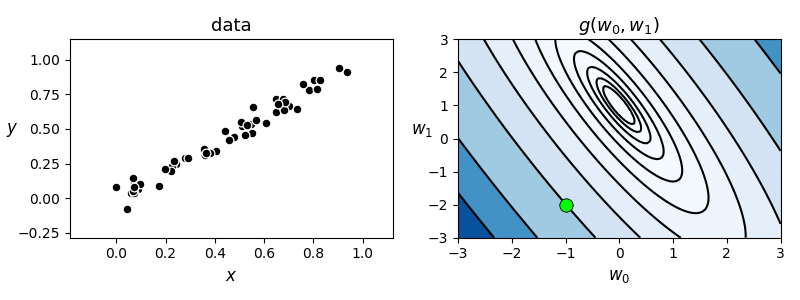
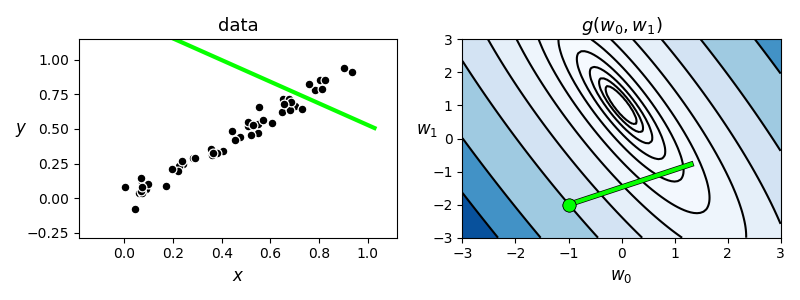
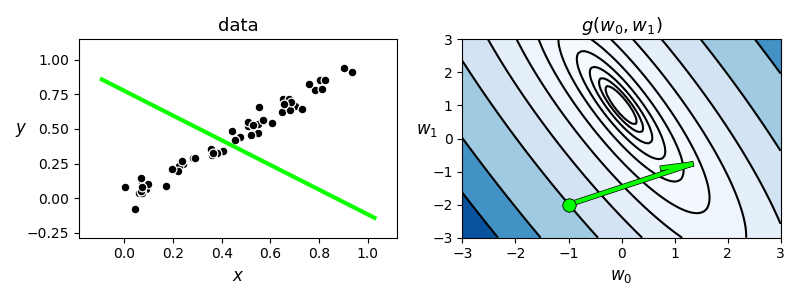
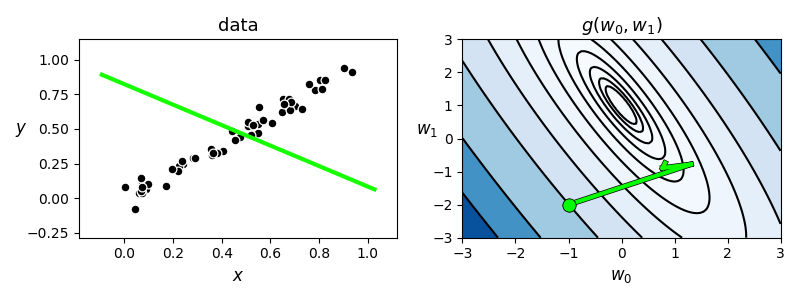
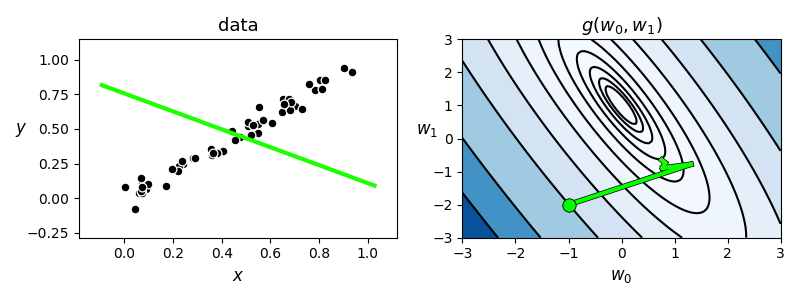
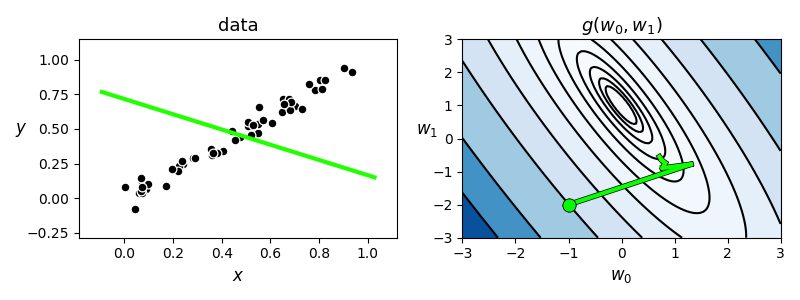
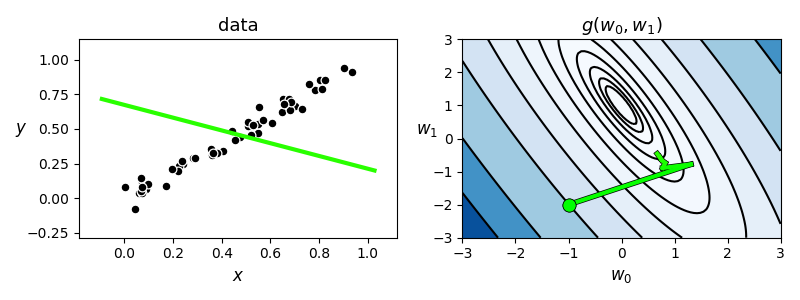
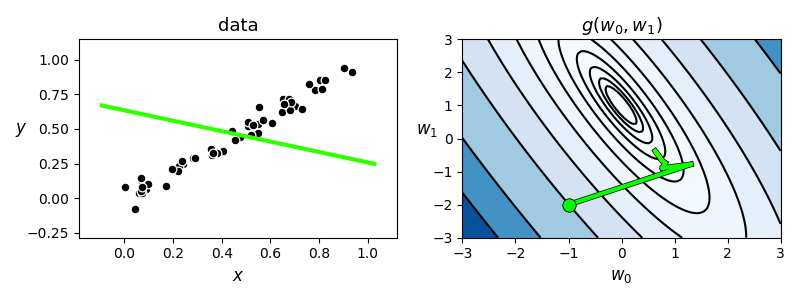
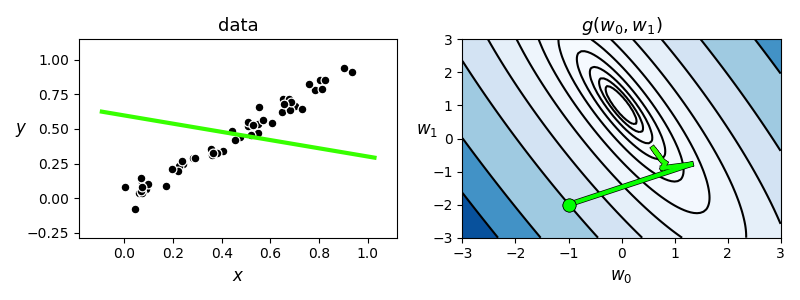
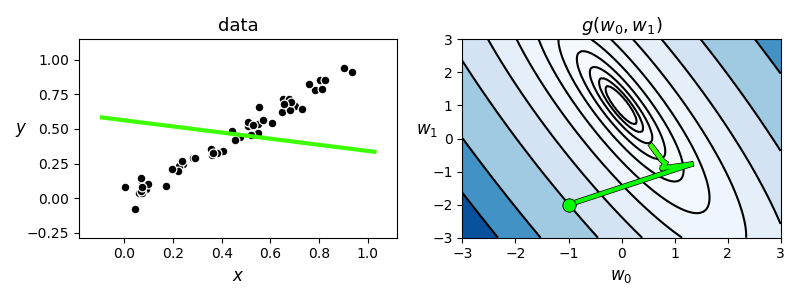
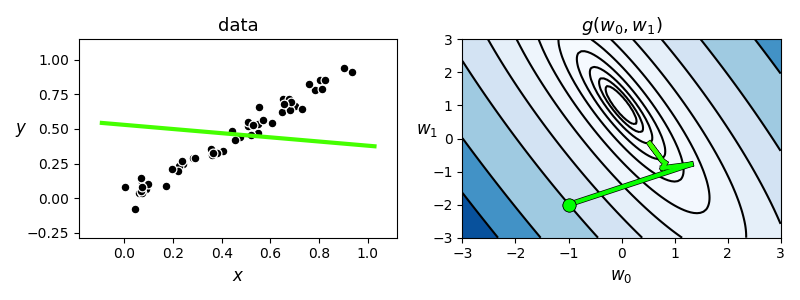
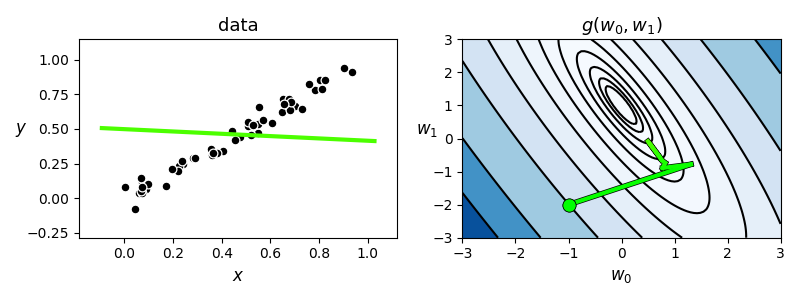
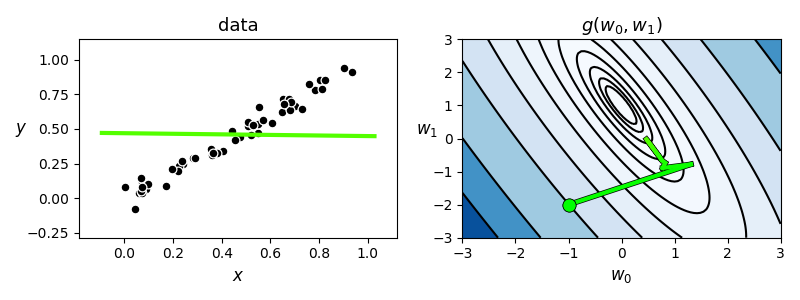
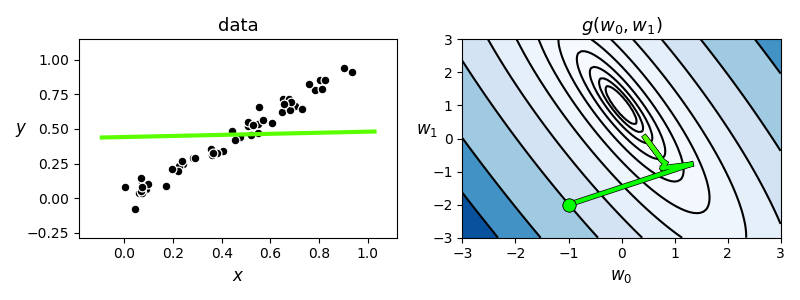
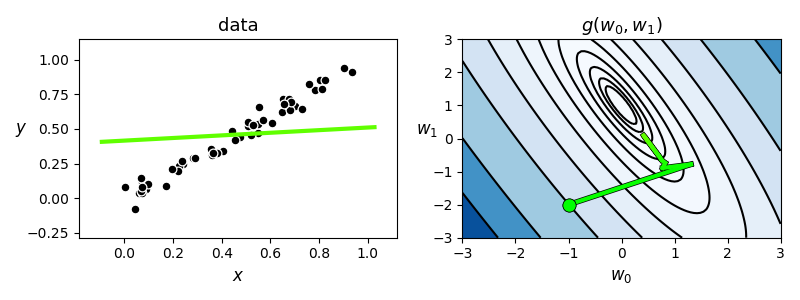
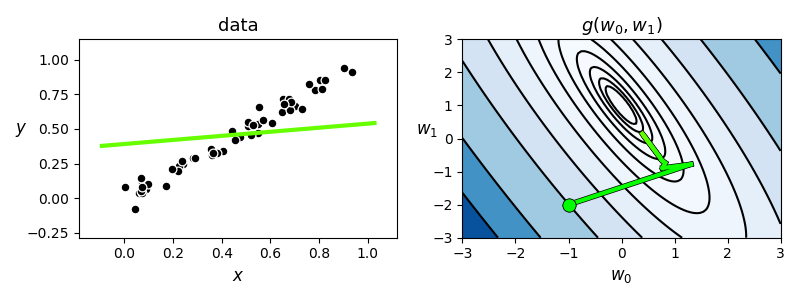
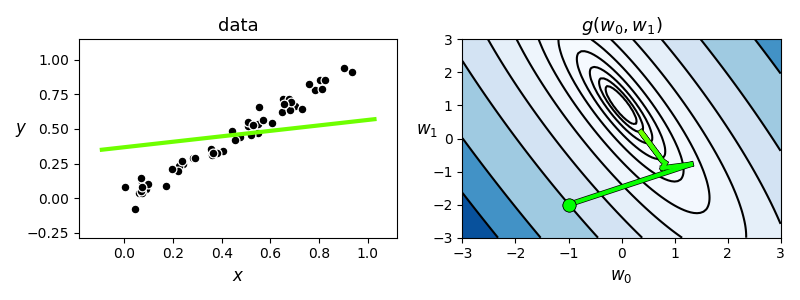
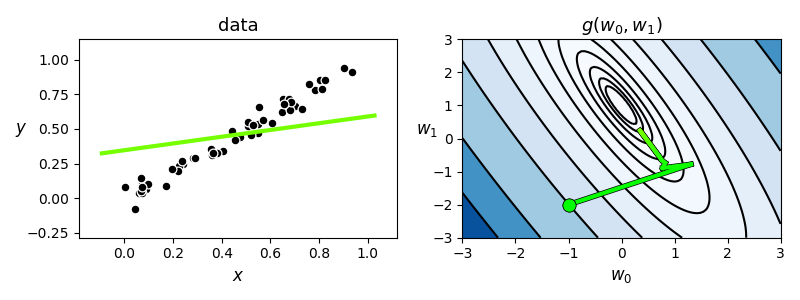
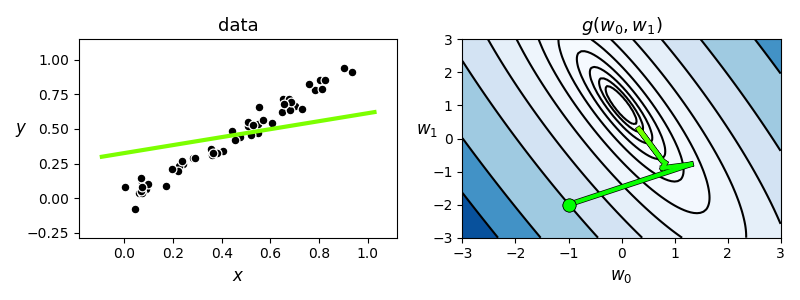
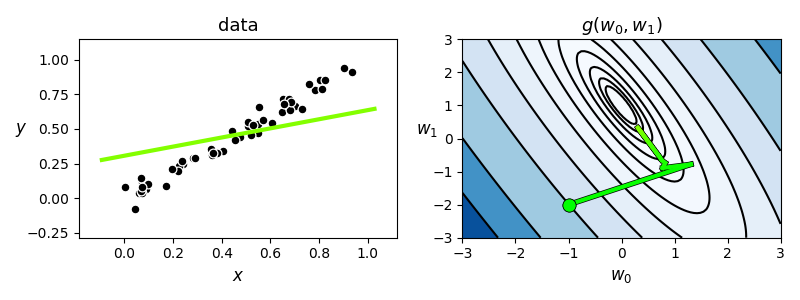
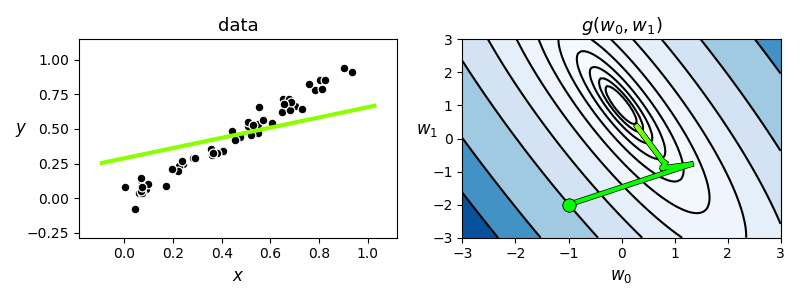
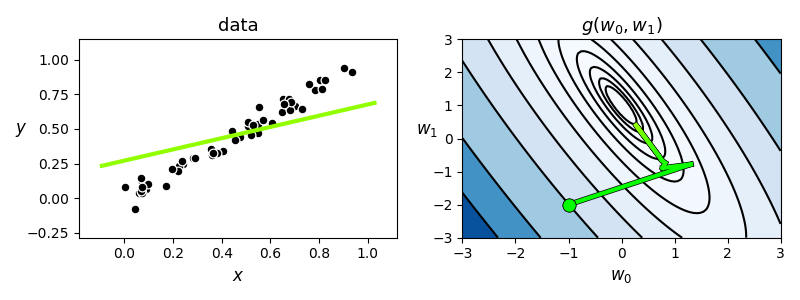
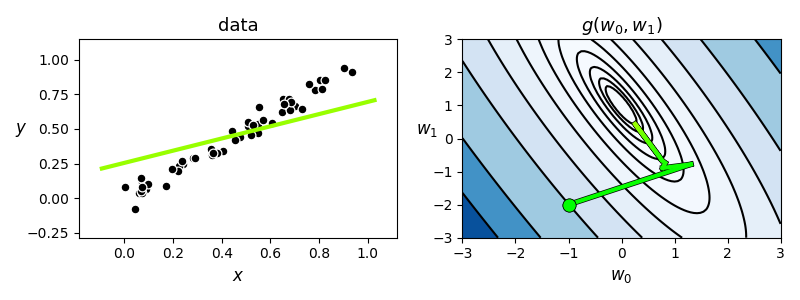
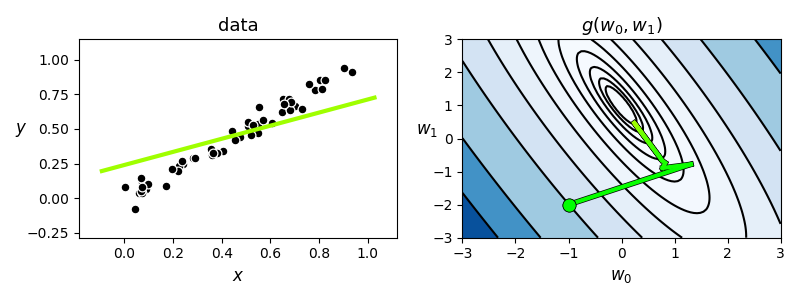
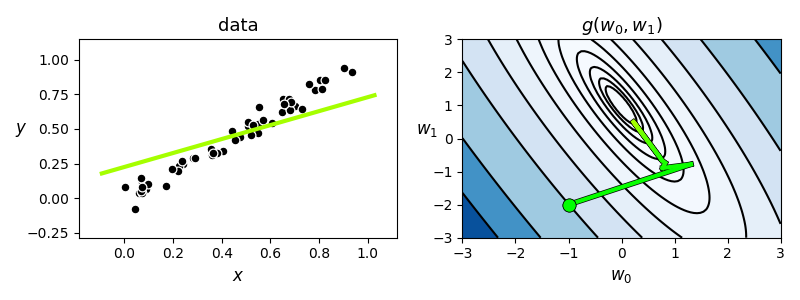
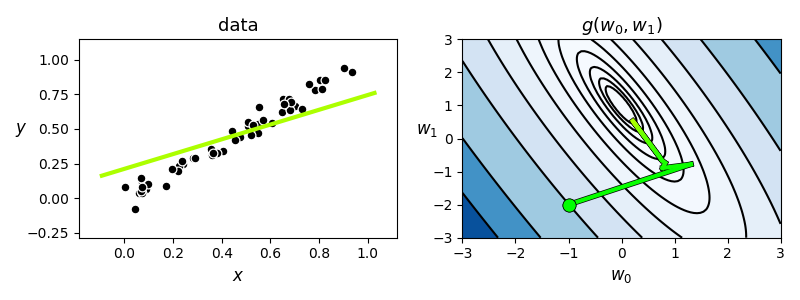
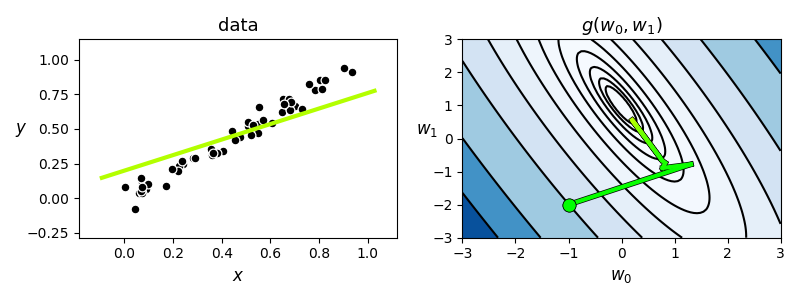
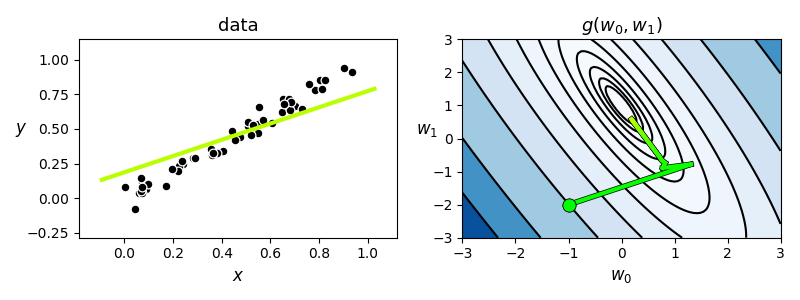
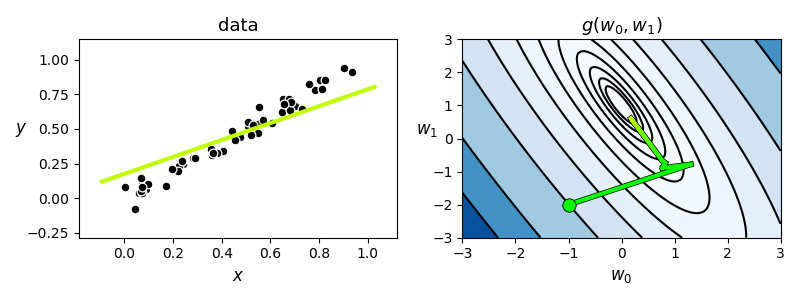
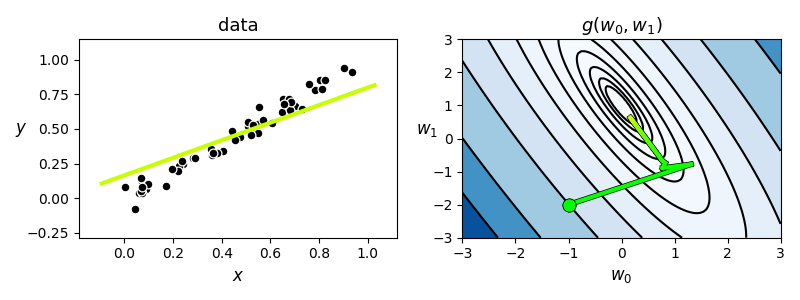
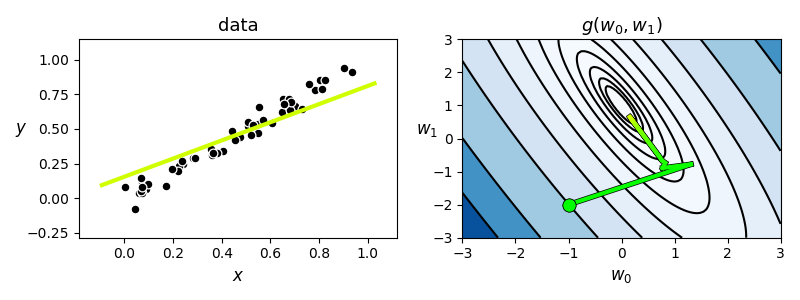
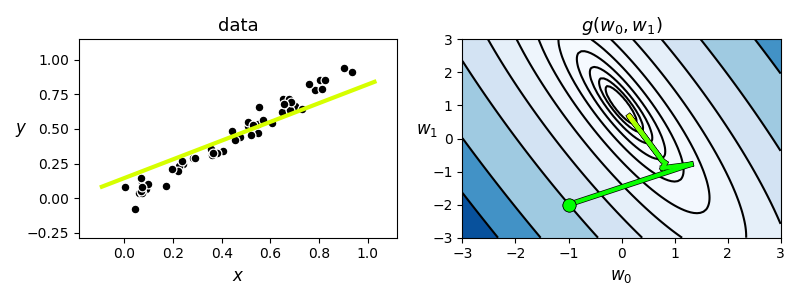
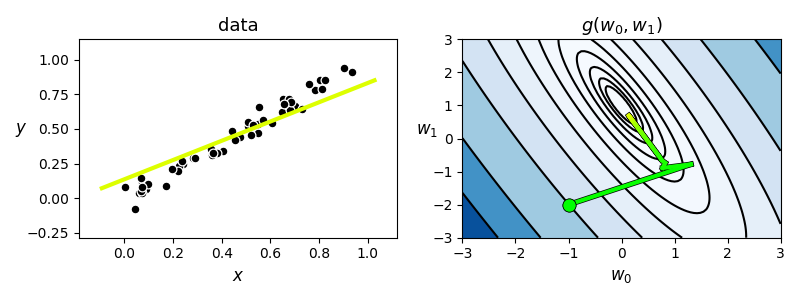
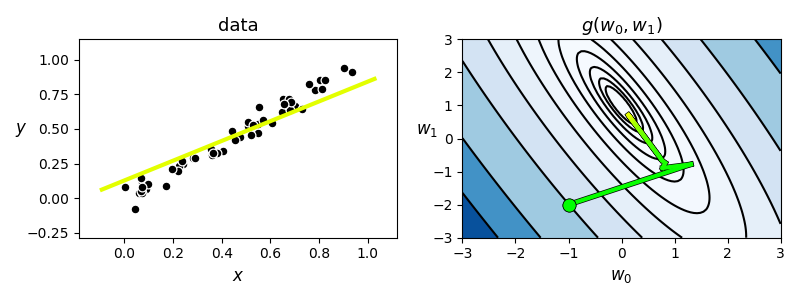
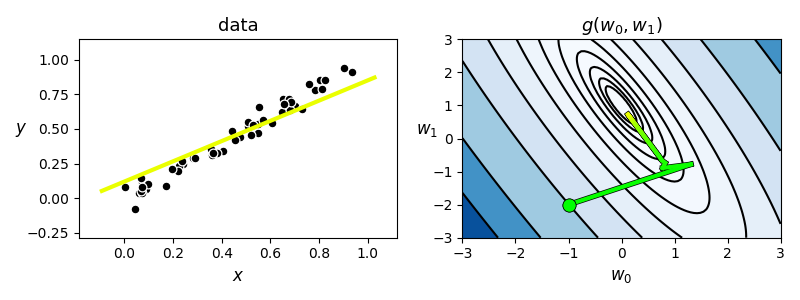
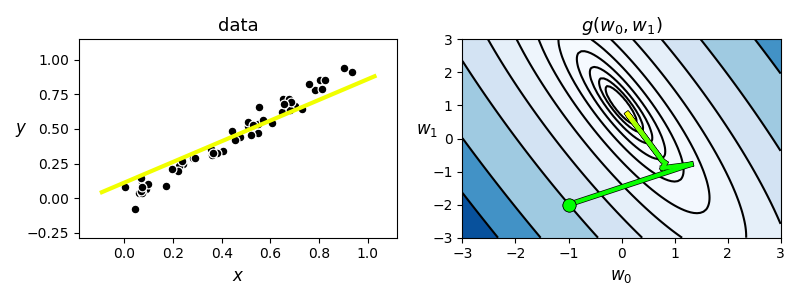
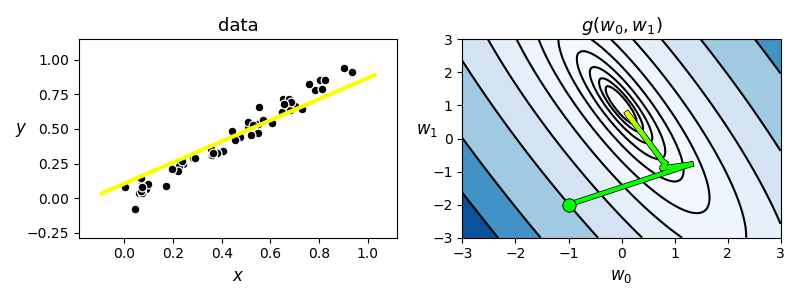
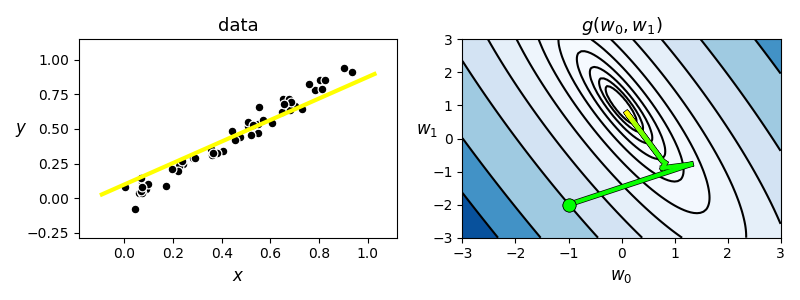
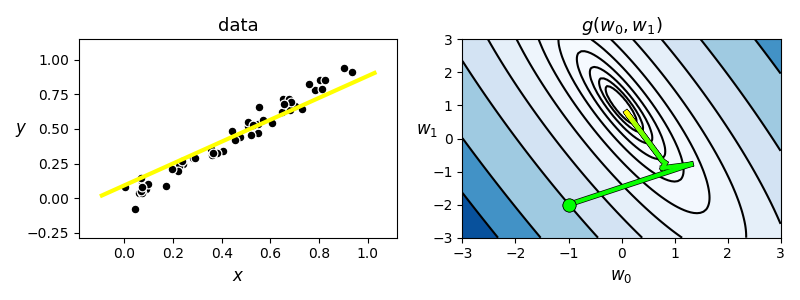
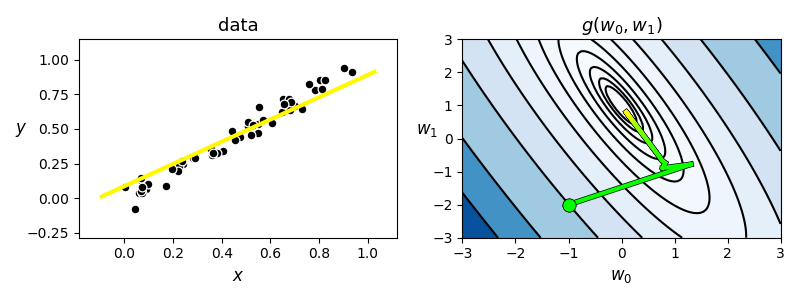
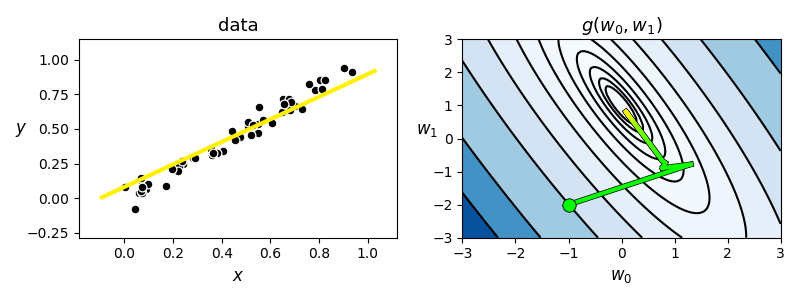
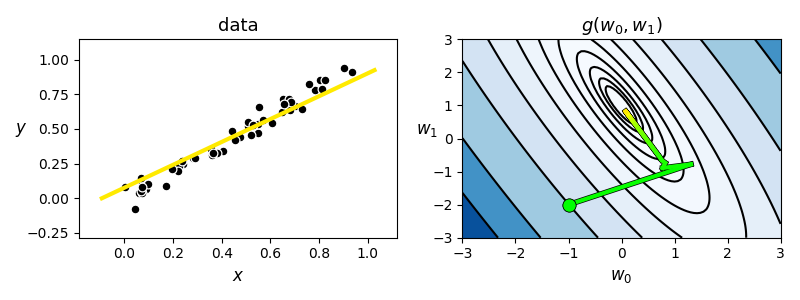
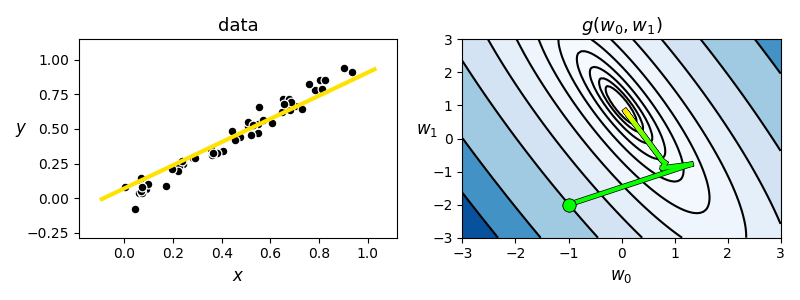
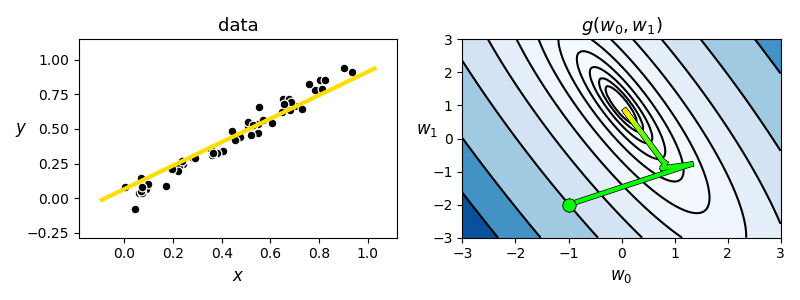
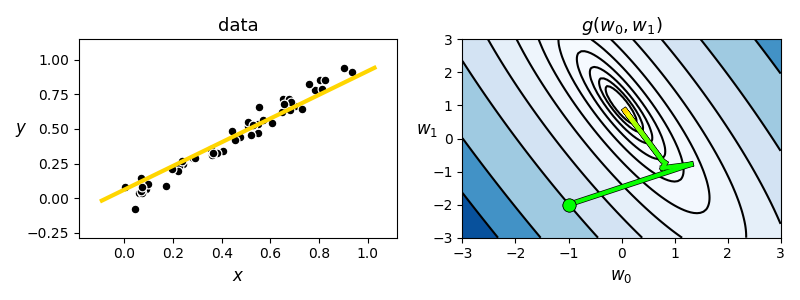
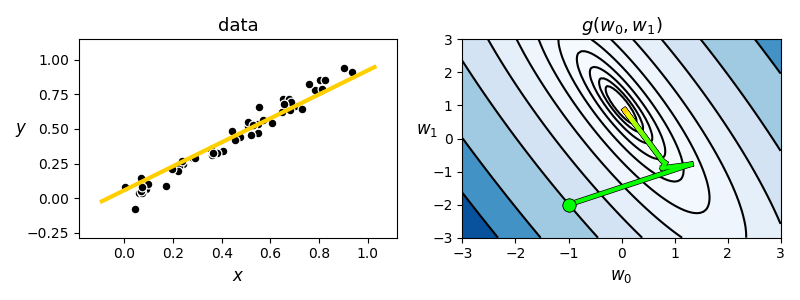
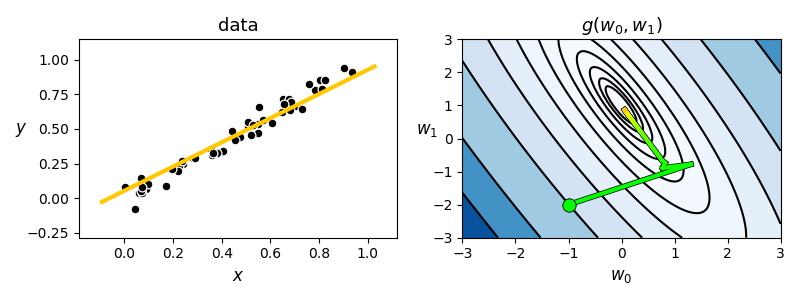
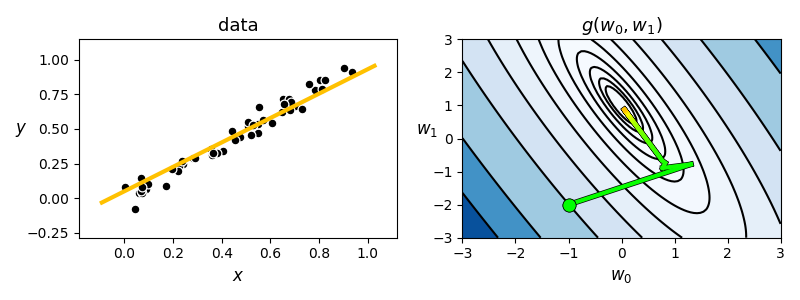
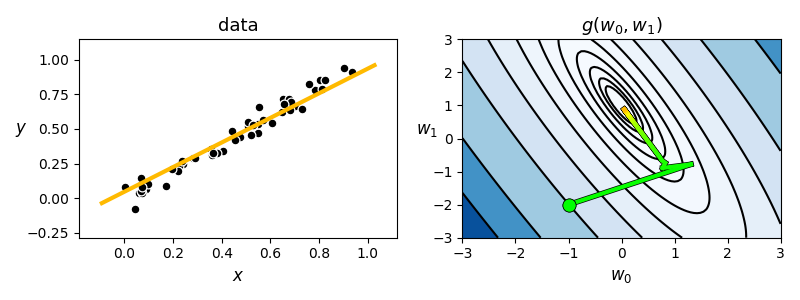
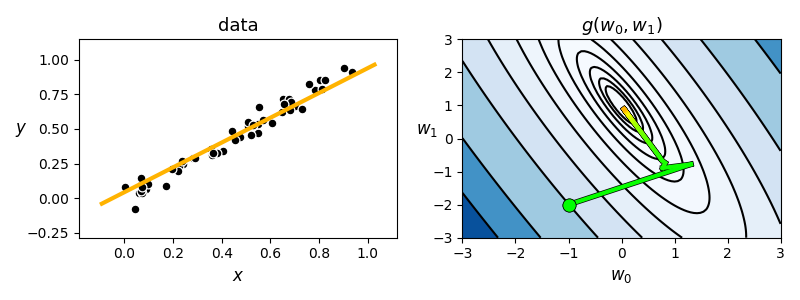
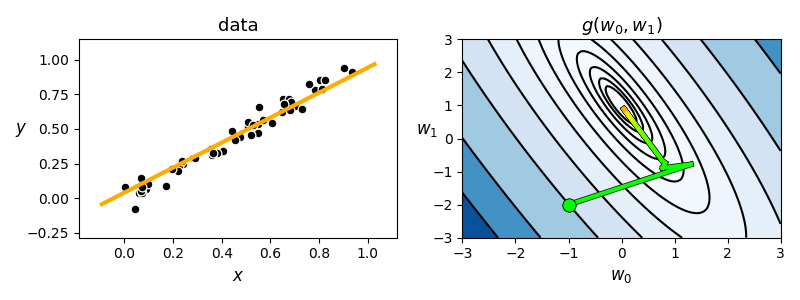
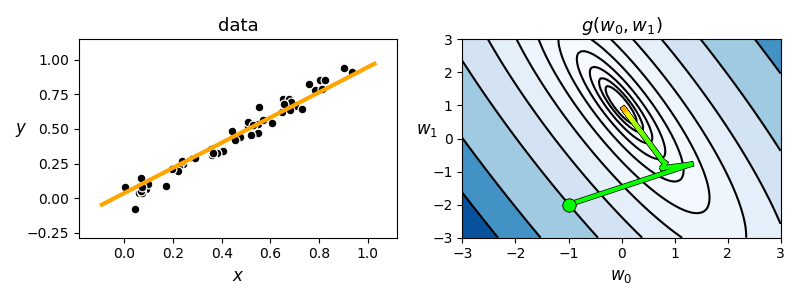
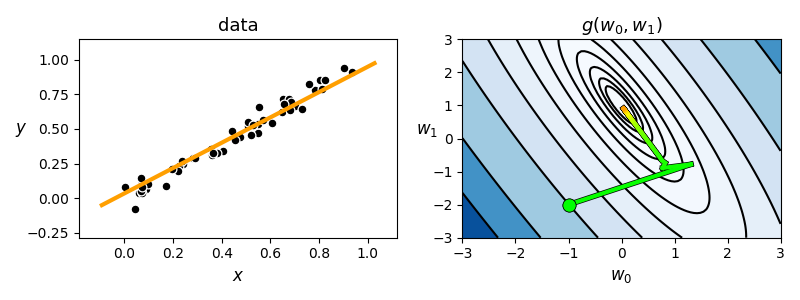
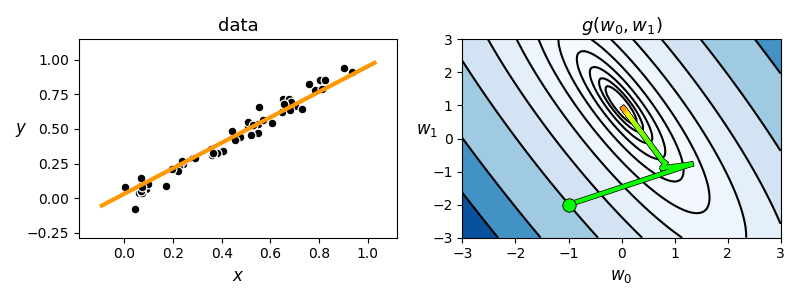
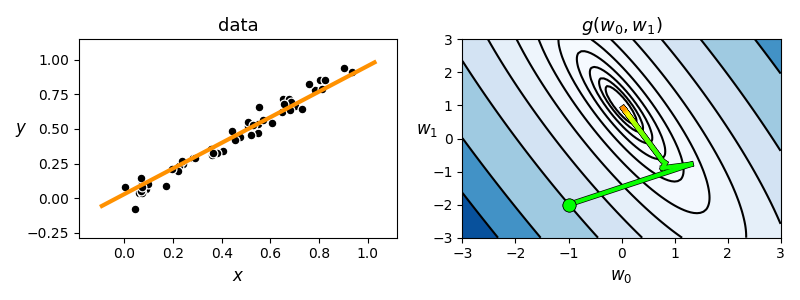
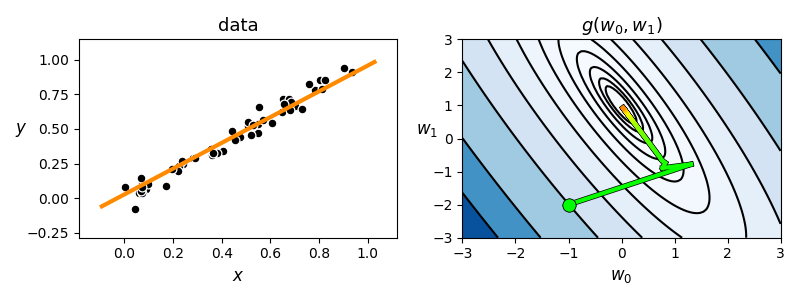
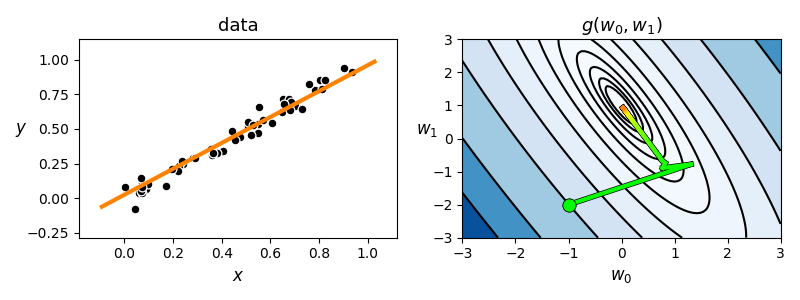
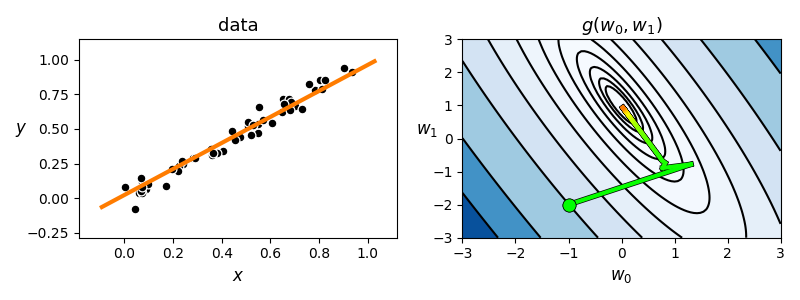
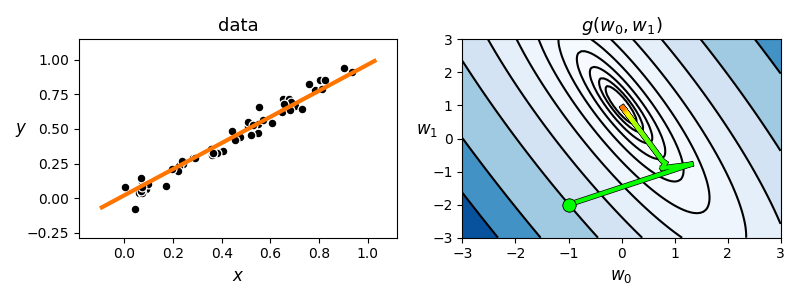
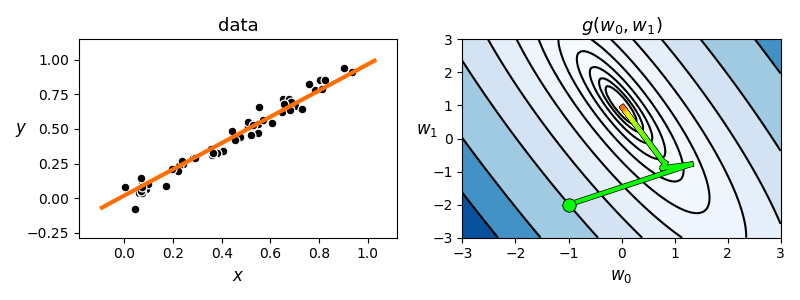
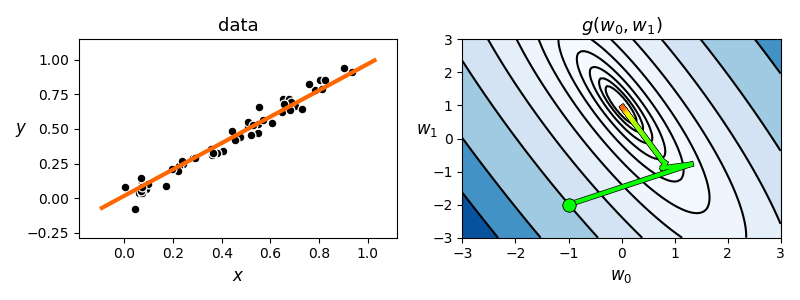
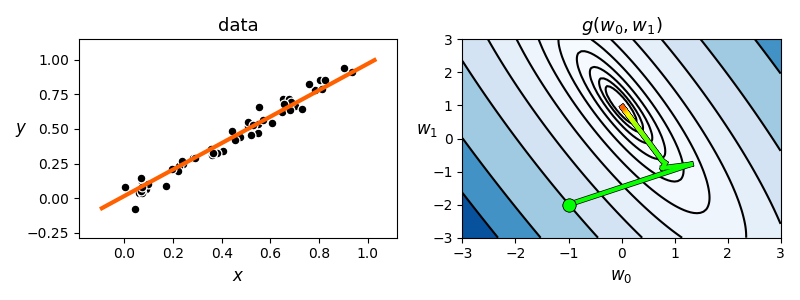
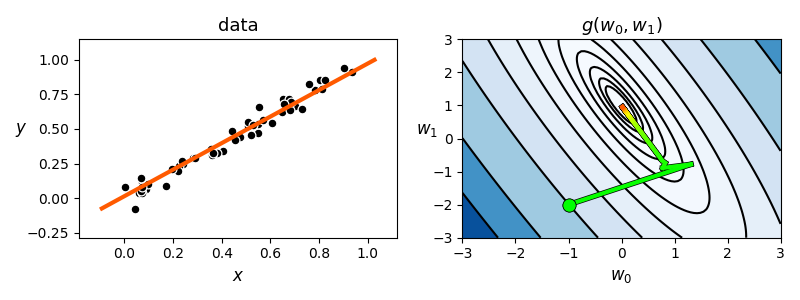
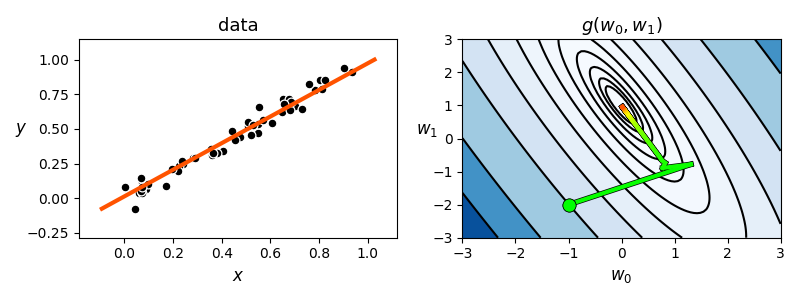
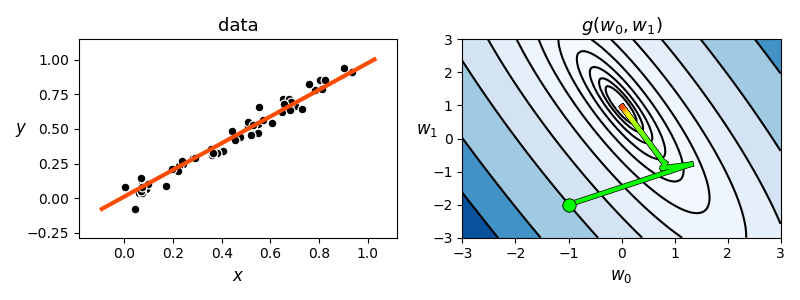
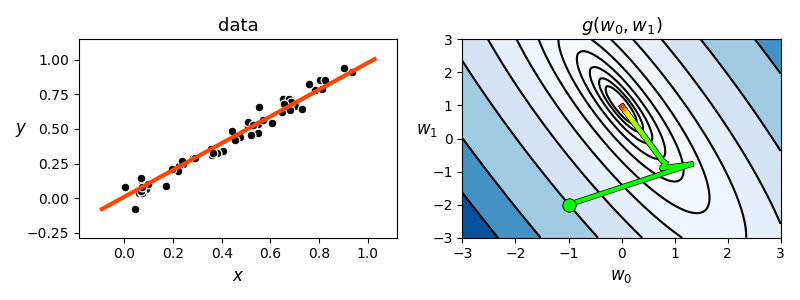
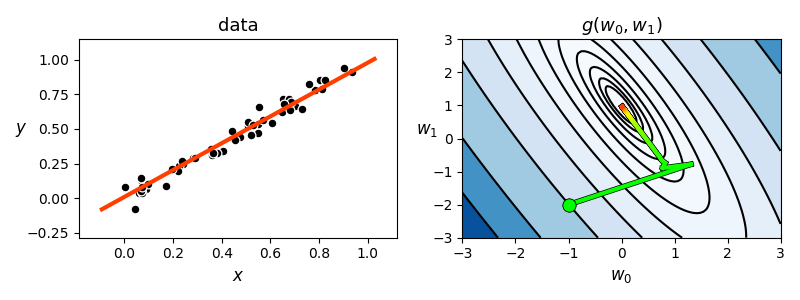
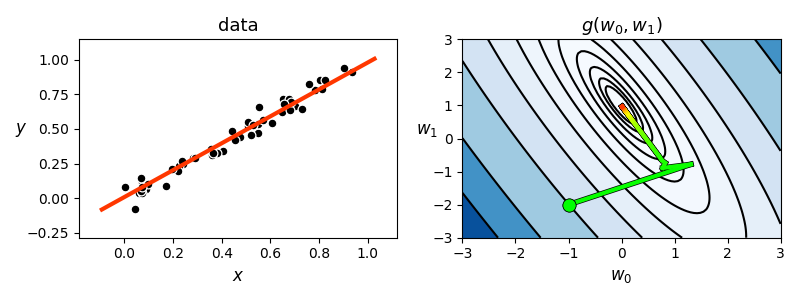
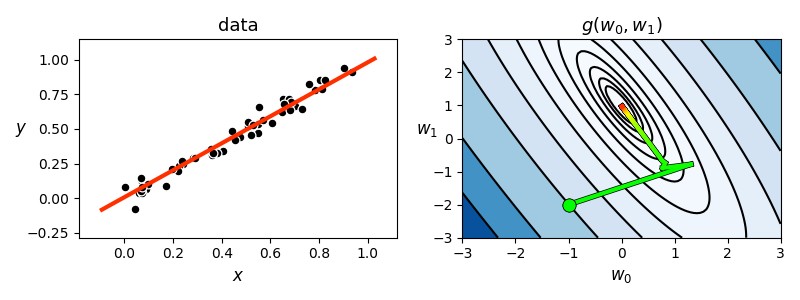
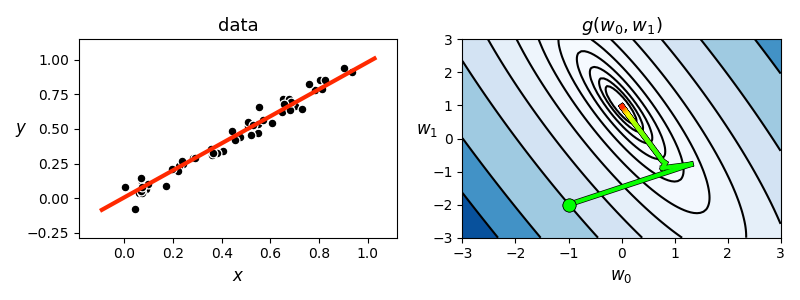
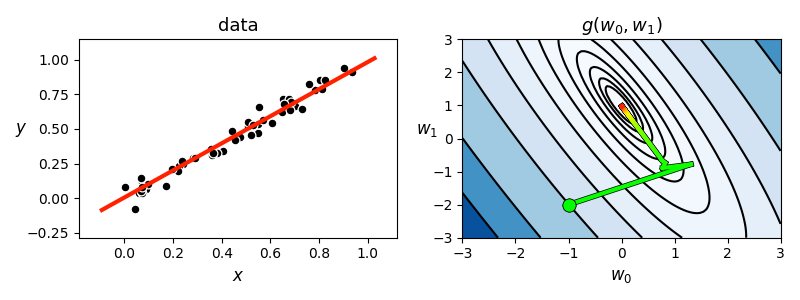
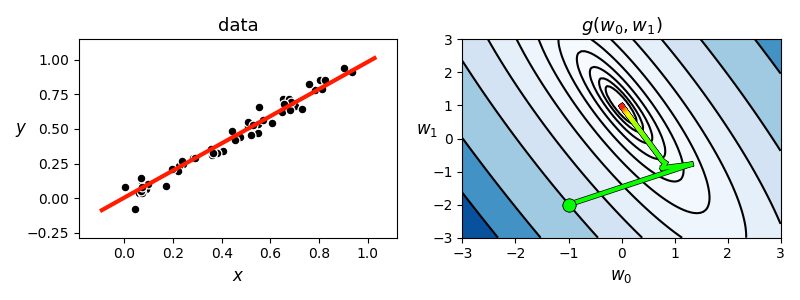
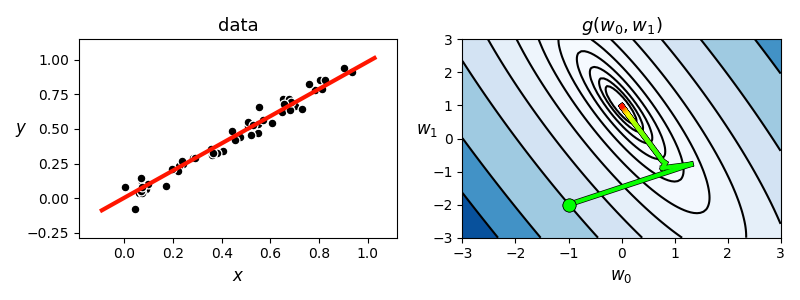
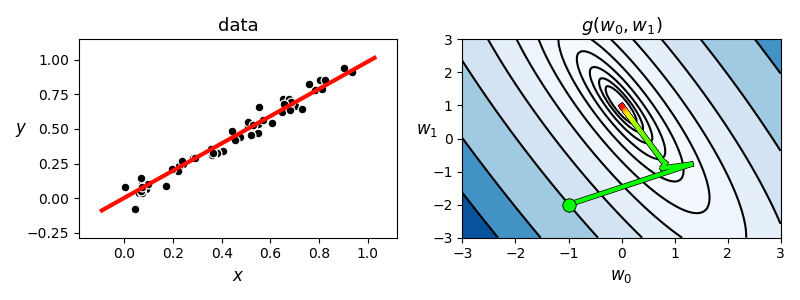
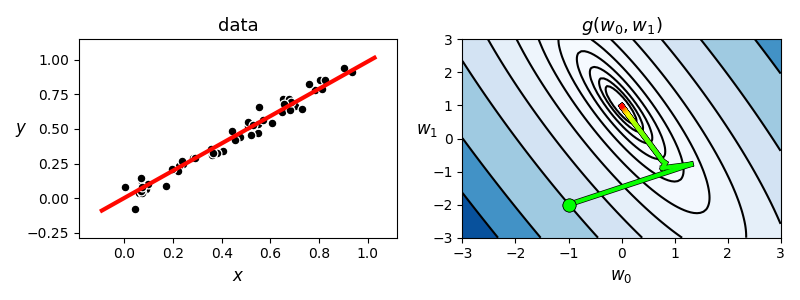
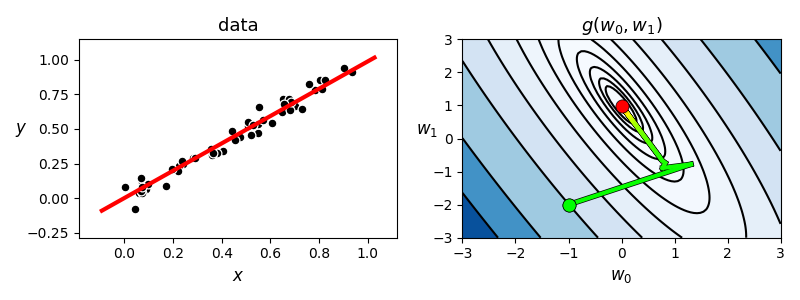

In [40]:
# setup algo, initial point, and max number of iterations
demo.run_algo(algo = 'gradient_descent',w_init = [-1,-2], max_its = 75,alpha = 0.01)

# animate descent process
demo.animate_it(num_contours = 30)

The simplest way to code up gradient descent in the same manner as shown above is to simply take the generic unnormalized gradient descent Python code provided in Part 2 of our *series on mathematical optimization*, and simply plug in the Least Squares cost function.  Here the  automatic differentiator [autograd](https://github.com/HIPS/autograd) is used to efficiently compute the gradient at each step.  One can implement the cost function in Python as shown in the next Python cell.

In [10]:
# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
x = data[:,0]    # define input of dataset prior to function definition
y = data[:,1]    # define output of dataset prior to function definition
def g(w):
    cost = 0
    for p in range(0,len(y)):
            cost +=(w[0] + w[1]*x[p] - y[p])**2
    return cost

Note that because autograd will differentiate with respect to any input to a Python function, officially the only input here can be the weights ```w```.  The input/output data ```x``` and ```y``` should be loaded in prior to defining the function, so that they are included in the scope of the Least Squares implementation, but treated as weights by autograd.  Note also that autograd gradient requires input weights be of type ```autograd.numpy```.

Using the implementation above we can evaluate any set of weights we like.

In [12]:
# test out a set of weights using our implementation of the N = 2 least squares function
w = [0,1]
g(w)

0.11438129466751287

To deal with arbitrary input dimension $N$ one then only needs to replace the cost update in line 7 of the implementation ```cost +=(w[0] + w[1]*x[p] - y[p])**2``` with the more general form.

Alternatively one can 'hard code' the gradient, writing it out algebraically and implementing the same thing in code.  One can easily compute the general form of the gradient by hand (using the derivative rules detailed in our *series on the vital elements of calculus*) to be

\begin{equation}
\nabla g\left(\mathbf{w}\right) = \sum_{p=1}^{P} \mathbf{x}_p^{\,}\left(\mathbf{x}_p^T \mathbf{w}_{\,}^{\,} - y_p^{\,}\right)
\end{equation}

#### <span style="color:#a50e3e;">Example 4: </span> Using Newton's method to minimize the Least Squares cost on our toy dataset

In Example 6 of our post on Newton's method in our *series on mathematical optimization* we described how Newton's method perfectly minimizes any quadratic function in a single step.  By re-writing it one can show that Least Squares cost function - with any dataset and any $N$ - is always a quadratic function, hence Newton's method can be used to minimize it in a single step.  

$$
\,g\left(\mathbf{w}\right)=\sum_{p=1}^{P}\left(\mathbf{x}_{p}^{T}\mathbf{w}-y_{p}^{\,}\right)^{2}
$$

Specifically, by rewriting the cost function one can show that it can be equivalently written out in general as 

$$
g(\mathbf{w}) = \mathbf{w}^T \mathbf{A}^{\,} \mathbf{w} + \mathbf{b}^T \mathbf{w} + c
$$

where 

\begin{equation}
\mathbf{A} = \sum_{p=1}^{P}\mathbf{x}_{p}^{\,} \mathbf{x}_{p}^T   \,\,\,\,\,\,\,\,\,\,\,\,\,\mathbf{b} = -2\sum_{p=1}^{P}\mathbf{x}_{p}^{\,}y_p^{\,} \,\,\,\,\,\,\,\,\,\,\,\,\, c = \sum_{p=1}^{P}y_p^2
\end{equation}

We illustrate the fact that Newton's method can fit a linear regression in a single step below using the same setup as in the previous example, except Newton's method is now used instead of gradient descent.  Indeed it takes only a single step to reach the minimum of the cost, while simultaneously finding a set of weights that produces a perfectly fitting line.


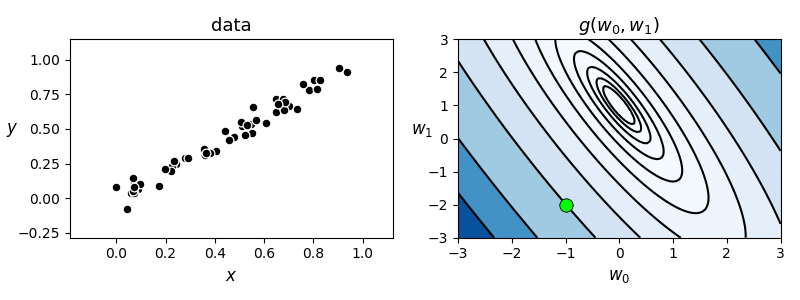
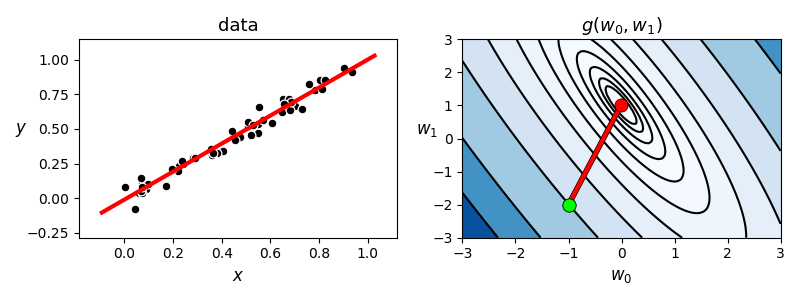

In [8]:
# setup algo, initial point, and max number of iterations
demo.run_algo(algo = 'newtons_method',w_init = [-1,-2], max_its = 1)

# animate descent process
demo.animate_it(num_contours = 30)

As with gradient descent, one can repeat this experiment by taking the Newton's method code provided in our *series on mathematical optimization* - which also uses the autograd automatic differentiator - and simply plug in the Python implementation of the Least Squares cost function given in the previous example.

Alternatively if one wishes to write out the Newton step analytically it can be shown to reduce to the following single system of linear equations to solve.

\begin{equation}
\left(\sum_{p=1}^{P} \mathbf{x}_p^{\,}\mathbf{x}_p^T \right) \mathbf{w}_{\,}^{\,} =  \sum_{p=1}^{P} \mathbf{x}_p^{\,} y_p^{\,}
\end{equation}

## 1.4  The efficacy of a learned model

Once we have successfully minimized the Least Squares cost function for linear regression there are a number of ways of measuring the quality of a linear model's fit to the data.  If we denote the optimal set of weights found as $\mathbf{{w}^{\star}}$, then we can compute the average error - commonly called the *mean squared error (or MSE)* - on the dataset by simply computing the average fit of the model to our dataset as

\begin{equation}
MSE=\frac{1}{P}\underset{p=1}{\overset{P}{\sum}}\left(\mathbf{x}_{p}^{T}\mathbf{w}^{\star}-y_{p}^{\,}\right)^{2}.
\end{equation}

When possible it is also a good idea to compute the MSE of a learned regression model on a set of new testing data, i.e., data that was not used to learn the model itself, to provide some assurance that the learned model will perform well on future data points. This is explored in further detail in a later post in this Series.

## 1.5 Predicting the value of new input data

With optimal parameters $\mathbf{w}^{\star}$, found by minimizing the Least Squares cost, we can predict the output $y_{\textrm{new}}$ of a new input feature $\mathbf{x}_{\textrm{new}}$ by simply plugging the new input into the tuned linear model and estimating
the associated output as 

\begin{equation}
y_{\textrm{new}}^{\,}=\mathbf{x}_{\textrm{new}}^{T}\mathbf{w}^{\star}.
\end{equation}

This is illustrated pictorially on a toy dataset for the case when $N=1$ in the Figure below.

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_3_5.png' width="50%" height="50%" alt=""/>
  <figcaption>   
<strong>Figure 3:</strong> <em>  Once a line/hyperplane
has been fit to a dataset via minimizing the Least Squares cost function
it may be used to predict the output value of future input. Here a
line has been fit to a two dimensional dataset in this manner, giving
optimal parameters $w^{\star}$, and the output value
of a new point $x_{\textrm{new}}$ is made using the learned linear
model as $y_{\textrm{new}}=x_{\textrm{new}}w^{\star}$. </em>  </figcaption> 
</figure>

## 1.6 Appendix

In this brief Section we provide derivations which a) confirm that the Least Squares cost function for linear regression is always convex and b) compute its analytical Lipschitz constant.  As detailed in our *series on mathematical optimization* the latter value provides a conservative lower bound on the magnitude of fixed steplength values one should try out with gradient descent.

### Proof that the Least Squares cost function is convex

First - to show that the cost function is convex we can use the fact that it is a quadratic - as indicated in Example 4 above.  There we mentioned that, when written in quadratic form, the matrix generating the corresponding quadratic can be written as $\mathbf{A} = \sum_{p=1}^{P}\mathbf{x}_{p}^{\,} \mathbf{x}_{p}^T$.  From our post on quadratic functions and eigenvalues in our *series on the vital elements of calculus*, to show that this quadratic is convex we can just show that the eigenvalues of this matrix are all nonnegative.  Furthermore, we know that the smallest eigenvalue of any square symmetric matrix $\mathbf{A}$ is given as the minimum of the *Raleigh quotient* (as detailed in our post on unconstrained optimality conditions in the *vital elements of calculus* series), i.e., the smallest value taken by 

\begin{equation}
\mathbf{w}^T \mathbf{A} \mathbf{w}^{\,}
\end{equation}

for any unit-length vector $\mathbf{w}$ i.e., where $\left\Vert\mathbf{w}\right\Vert_2 = 1$.  Substituting in the particular form of $\mathbf{A}$ here we have

\begin{equation}
\mathbf{w}^T\left(\sum_{p=1}^{P}\mathbf{x}_{p}^{\,} \mathbf{x}_{p}^T \right) \mathbf{w}^{\,} =  \sum_{p=1}^{P}\left(\mathbf{w}^T\mathbf{x}_{p}^{\,}\right)\left( \mathbf{x}_{p}^T \mathbf{w}^{\,} \right) = \sum_{p=1}^{P}\left(\mathbf{w}^T\mathbf{x}_{p}^{\,}\right)^2.
\end{equation}

Since each term in the summand is squared, the sum must be nonnegative.  Therefore the minimum eigenvalue of the Least Squares cost (quadratic) function is nonnegative, and it is therefore convex.

### Computation of the Lipschitz constant 

Since we have just seen that the cost function is convex in order to compute a Lipschitz constant we can simply compute the largest eigenvalue of the matrix $\mathbf{A} = \sum_{p=1}^{P}\mathbf{x}_{p}^{\,} \mathbf{x}_{p}^T$.  This is precisely given as the *squared 2 norm* of this matrix, i.e.,

\begin{equation}
L = \left\Vert \sum_{p=1}^{P}\mathbf{x}_{p}^{\,} \mathbf{x}_{p}^T \right\Vert_2^2
\end{equation}

which one can compute via e.g., the *power method*.

For a larger but easier to compute Lipschitz constant one can use the trace of the matrix $\mathbf{A}$, since this equals the sum of all the matrices (nonnegative) eigenvalues, which must be larger than its maximum value.